<a href="https://colab.research.google.com/github/AndromedaOMA/Advanced_Analytics_with_Apache_Spark---E.On_Software_Development/blob/main/Laboratory_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pregătire mediu de lucru

In [1]:
from google.colab import drive
# drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://dlcdn.apache.org/spark/
!wget -q https://dlcdn.apache.org/spark/spark-3.4.4/spark-3.4.4-bin-hadoop3.tgz
!tar xf spark-3.4.4-bin-hadoop3.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j
import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.4.4-bin-hadoop3"
import findspark
findspark.init()
findspark.find()
import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as f
spark= SparkSession.builder.getOrCreate()
spark

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,604 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,697 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,844 kB]
Get:13 http://security.ubuntu.com/ubuntu jam

In [3]:
path = '/content/drive/MyDrive/E.on/E.on_Data/Data/Course_III/customers_cleaned/practice/parquet'
data_df = spark.read.format('parquet').load(path)
data_df.show(n=10, truncate=False)

+--------+------+------------------+-------+-------+----+------------------------------+
|nume    |varsta|ocupatie          |vechime|inactiv|zona|extra                         |
+--------+------+------------------+-------+-------+----+------------------------------+
|Gabriel |44    |Specialist vânzări|21     |NULL   |E   |[5G Router, Sauna, PV]        |
|George  |46    |Agent imobiliar   |25     |false  |G   |[5G Router, 5G Router, WII]   |
|Gheorghe|34    |Specialist HR     |8      |NULL   |D   |[PC, Sauna]                   |
|Grigore |44    |Specialist vânzări|21     |NULL   |E   |[WII, Piscina, Piscina]       |
|Horia   |42    |Arhitect          |18     |NULL   |E   |[Piscina, AC]                 |
|Ilie    |26    |Vânzător retail   |2      |NULL   |B   |[EV]                          |
|Ion     |27    |Vânzător retail   |2      |NULL   |B   |[PS5]                         |
|Ionel   |45    |Inginer civil     |23     |NULL   |G   |[EV, XBOX, 5G Router]         |
|Iosif   |26    |Cont

---

# Spark Core

## Arhitectura Spark

Spark folosește o arhitectură
care se bazează pe o mașină
principală, numită Master, care
prin intermediul unui serviciu,
numit Cluster Manager, dă
ordine către mașinile care vor
executa comenzile, numite
Executor.

În procesul în care este rulat
Spark, numit Spark Driver,
dezvoltatorul va crea un obiect,
fie el în Java, Python, etc.,
numit Spark Context, prin care
librăria de Spark poate trimite
instrucțiunile către executori.

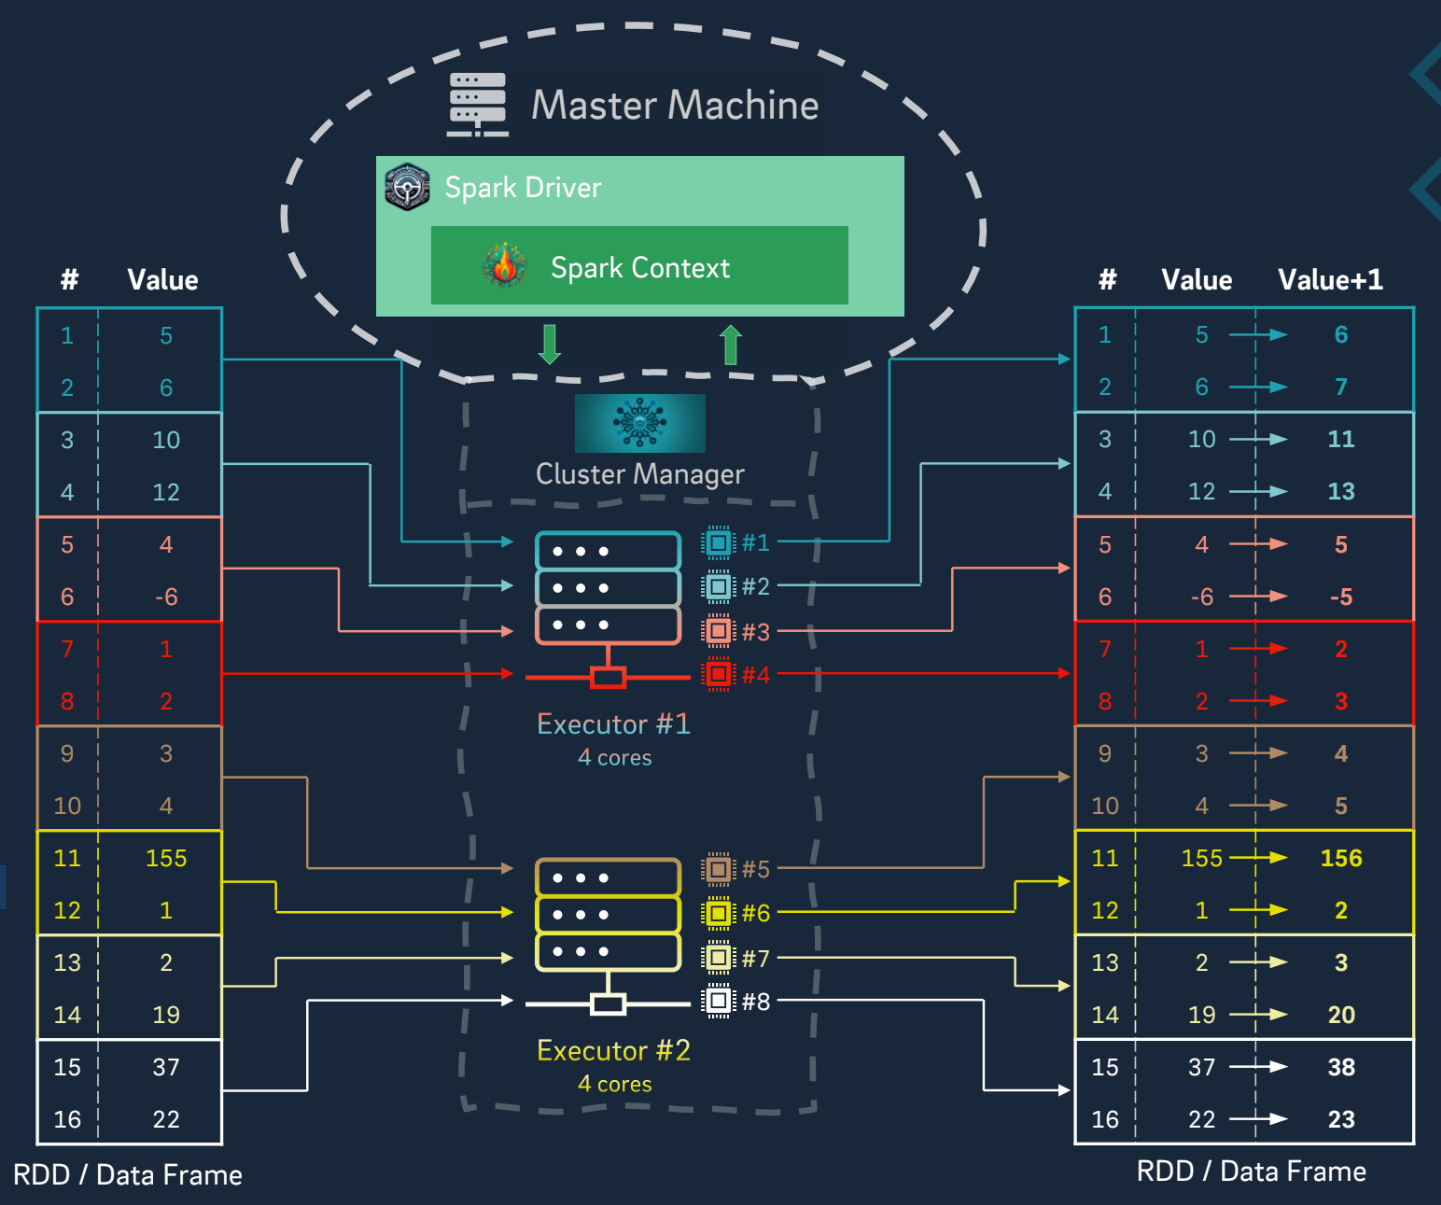

## Spark Core – PySpark

Spark Core este implementarea de bază din Spark. Extensiile precum Spark SQL folosesc această bază pentru a
transmite și monitoriza operațiile de transformare a datelor pe cluster. Poate fi folosită și în mod direct de PySpark.

Spark Core PySpark oferă:
*  Un obiect de tip Spark Context, folosit pentru interacțiunea cu Spark.
*  Un obiect de lucru cu date, numit RDD, oferind o interfață pentru executarea operațiilor Map-Reduce.
*  Funcții gata implementate precum operația de filtrare / ordinare.
*  Abilitatea de a construi propriile funcții de mapare / agregare în Python.
*  Acces direct la partițiile interne ale setului de date.

**Atenție!:**

Spre deosebire de Spark SQL, care suportă direct lucrul cu date semi-structurate sau structurate, precum
JSON, CSV, Parquet, Spark Core este limitat la citirea de date în format text sau binar.


## Spark Context

Spark Context este un obiect de Python oferit de librăria PySpark pentru Spark. Numai folosind acest obiect
putem accesa tot ce oferă librăria. Orice extensie Spark folosește la bază acest obiect.

Obiectul se creează astfel:

In [4]:
from pyspark import SparkConf
from pyspark.context import SparkContext

sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

Se pot modifica și setările interne la crearea sesiunii dacă dorim:

In [8]:
# from pyspark import SparkConf, SparkContext
# from pyspark.sql import SparkSession

# conf = SparkConf()
# conf.set('spark.driver.memory', '3g')

# sc = SparkContext('local[*]', 'My App', conf=conf)
# =====================================================
# from pyspark.sql import SparkSession, SparkConf
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession

# Get the existing SparkConf from the active SparkSession
conf = spark.sparkContext.getConf()

# Set the desired driver memory
conf.set('spark.driver.memory', '3g')

# Instead of creating a new SparkContext, get the existing one:
sc = spark.sparkContext

Dacă avem mai multe setări, adăugăm la lanț câte un apel la funcția config pentru fiecare setare. O listă cu toate
opțiunile disponibile găsiți la https://spark.apache.org/docs/latest/configuration.html sau o căutare pe Google.

## RDD - Resilient Distributed Dataset

Spark Core folosește un tip de obiect, numit RDD, pentru a gestiona un set de date. Acest obiect RDD reprezintă
defapt o listă de obiecte, fie ele text, numere sau chiar alte liste (recomandat să fie cu același număr de valori).

Crearea unui RDD Spark dintr-
o listă de liste Python. În acest
caz, toate rândurile vor fi liste
cu același număr de valori.

In [23]:
data = [
['Vali', 23, 'Programator', 4, None, 'A', ['Sport', 'Boardgames']],
['Vlad', 34, 'Instalator', 11, None, 'B',['Alergare']],
['Bea', 29, 'Reporter', 7, True, 'B', None]
]
data_df = sc.parallelize(data)

Fiind concepute pentru Big Data, un RDD nu încarcă datele. El reține doar locația datelor. La fiecare operație de
transformare (map / reduce) de date, un nou RDD va fi creat care reține locația și tipul rândului, precum și lanțul de
transformări. Transformările vor fi efectuate doar în momentul scrierii sau colectării datelor de către executori.

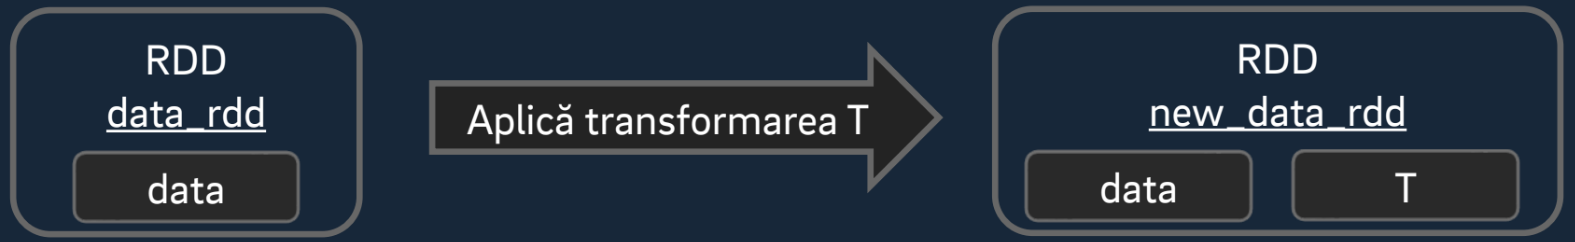

## Citirea Datelor

În Big Data, în general, datele sunt stocate extern în unul sau mai multe formate. PySpark Spark Core oferă
metode pentru citirea datelor în format binar / text pe care dezvoltatorul le poate ulterior parsa.

Citirea unui fișier text. O linie a fișierului / rând din RDD:

In [17]:
data_rdd = sc.textFile('/path/to/text/file')

Citirea fișierelor unui folder. Un întreg fișier / rând din RDD:

In [25]:
data_rdd = sc.wholeTextFiles('/path/to/text/file')

De asemenea, fișierul sau fișierele unui folder pot fi citite și în format binar direct.

Citirea unui fișier / folder direct în format binar. Un întreg fișier / rând din RDD:

In [11]:
data_rdd = sc.binaryFiles('/path/to/file/or/folder')

Spark Context are multe funcții pentru diverse operații. O listă cu toate opțiunile disponibile găsiți la
https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.SparkContext.html#pyspark.SparkContext.

## Data Frame – Colectarea Datelor

De multe ori ne găsim în situația în care este nevoie să depanăm procesul de transformare a datelor. Așadar, Spark
ofertă metode de colectare a datelor pentru acest scop, dar și pentru prelucrarea ulterioară cu alte librării.

* Pentru a colecta datele într-o listă de Python, folosim:

In [ ]:
data_list = data_rdd.collect()

* Pentru a colecta datele într-un dicționar atunci când rândurile au doar două elemente:

In [ ]:
data_pandas_pdf = data_df.collectAsMap()

**Atenție!**

 Datele sunt transferate mai întâi de la executori pe Spark Driver la colectare. Dacă sunt prea multe
date, există pericolul ca procesul de Spark Driver să nu mai facă față și să fie terminat de către sistem.

## Scrierea Datelor

În Big Data, după procesare, datele sunt stocate. PySpark Spark Core oferă metode pentru scrierea în diverse
formate de stocare de nivel jos, precum text.

* Scrierea fișierelor în format text:

In [ ]:
data_rdd.saveAsTextFile('/path/to/save/folder/')

Fiecare partiție de date va fi scrisă în câte un fișier. Fiecare rând din partiție va fi scris pe câte o linie din fișier.
Valorile rândului vor fi scrise despărțite prin spații.

Se pot scrie și formate mai sofisticate, formatul Pickle, foarte utilizat în cadrul Python:

* Scrierea fișierelor în format Pickle:

In [ ]:
data_rdd.saveAsPickleFile('/path/to/save/folder')

OBS: RDD-urile au mai multe funcții pentru scrierea datelor. O listă cu toate opțiunile disponibile găsiți la
https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.RDD.html.

## Maparea Datelor - Map

Principalele metode de transformare a RDD-urilor sunt metodele din paradigma Map-Reduce precum operația map.

* Operația de Mapare / rând – Aplicarea unui funcții asupra fiecărui rând (Un nou obiect de tip RDD este returnat care transformă fiecare rând după funcția furnizată. RDD-ul de la care
a pornit maparea va rămâne neschimbat.)

In [ ]:
new_data_rdd = data_rdd.map(lambda x: (x[0], x[1] + 1, x[6]))
print(data_rdd.collect())
print(new_data_rdd.collect())

## Maparea Datelor – Flat Map

Spark Core oferă și o metodă de mapare care permite funcției furnizate să returneze mai multe rânduri.

Operația de Mapare / un rând la mai multe rânduri – Aplicarea unui funcții asupra fiecărui rând: (Un nou obiect de tip RDD este returnat format din rândurile returnate de funcția furnizată. RDD-ul de la care
a pornit maparea va rămâne neschimbat. În acest caz, fiecare rând va returna câte două rânduri.)

In [ ]:
new_data_rdd = data_rdd.flatMap(lambda x: [ (x[0], x[1] + 1, consumer) for consumer in (x[6] or []) ])
print(data_rdd.collect())
print(new_data_rdd.collect())

## Pair RDD - Resilient Distributed Dataset Key-Value

Pentru a putea efectua operațiile de shuffle / reduce, trebuie specificat pentru fiecare rând o câte o cheie de grupare.
Așadar, din design-ul Spark, metodele de shuffle și reduce pot fi executate doar pe RDD-uri ale căror rânduri sunt
liste / tuple formate din două valori, prima valoare fiind considerată cheia, iar a doua datele, o valoare / listă de valori.

Folosirea operației Map pentru a converti fiecare rând la o listă / tupla de două elemente: (Un nou obiect de tip RDD este returnat format din rânduri a câte două valori, prima fiind valoarea coloanei 5
din fiecare rând și a doua fiind datele originale. RDD-ul de la care a pornit maparea va rămâne neschimbat.)

In [ ]:
pair_rdd = data_rdd.map(lambda x: (x[5], x))
print(pair_rdd.collect())

## Reducerea Datelor – Reduce - Shuffle & Agregări

Operația completă de reduce compresează valorile cu aceeași cheie la un singur rând. Această funcție repartiționează
setul de date, grupând datele ce necesită reduse împreuna în aceeași partiție, după aplică funcția de reduce.

Operația de Reduce – Agregarea unui grup într-un singur rând: (Este returnat un nou Pair RDD, unde prima valoare din fiecare rând este cheia, iar a doua valoare este
rezultatul apelării funcției mai întâi pe valoarea inițială, în acest caz zero, și un rând din grup, apoi pe rezultat și
al doilea rând din grup, ș.a.m.d. Metoda foldByKey poate fi apelată doar pe Pair RDD-uri.)

In [ ]:
new_data_rdd = pair_rdd.foldByKey(0, lambda aggregation_now, next_row: aggregation_now + next_row[1])
print(pair_rdd.collect())
print(new_data_rdd.collect())

Spark mai întâi combină toate datele cu aceeași cheie care se află deja în aceleași partiții, apoi repartiționează
datele după cheie și combină rezultatele. În acest mod, se reduce numărul de date transferate la repartiționare.

## Reducerea Datelor – Shuffle

Spark Core nu constrânge dezvoltatorul doar la operații de Map-Reduce. Este oferită și o metodă care doar
repartiționează setul de date, grupând datele ce necesită reduse împreuna în aceeași partiție.

Operația de Reconfigurare a Partițiilor – Repartiționarea datelor după valoarea cheie: (Un nou obiect de tip RDD este returnat, cu numărul de partiții specificat. Rândurile cu aceeași valoare cheie
vor fi mutate în aceeași partiție. Metoda poate fi apelată doar pe Pair RDD-uri întrucât se bazează pe cheie.)

In [ ]:
repartitioned_pair_rdd = pair_rdd.partitionBy(2)

Operația de Reconfigurare a Partițiilor – Repartiționarea datelor în mod aleatoriu: (Un nou obiect de tip Data Frame este returnat cu numărul de partiții specificat, rândurile fiind distribuite în
mod aliator, dar echilibrat, la partiții. Metoda poate fi apelată pe orice fel de RDD. Metoda coalesce combină
partițiile existente, așadar poate fi apelată doar dacă se dorește micșorarea numărului de partiții a datelor.)

In [ ]:
new_data_df = data_rdd.repartition(2)
new_data_df = data_rdd.coalesce(1)